## Assignment 32_1
### ACD MDS (Mar 2018 batch) Student: K. Anandaranga
### PROJECT 3 - CLUSTERING

#### 3 QUESTIONS
(1) Which stocks are apparently similar in performance<br>
(2) How many Unique patterns that exist in the historical stock data set, based on fluctuations in price<br>
(3) which stocks are moving together and which all stocks are different from each other<br>

#### Download data from GoogleDrive

In [1]:
#  https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view

#### Install libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
import seaborn as sns
import pylab as pl
sns.set()

In [35]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [36]:
data = pd.read_csv ('data_stocks.csv')

In [37]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [38]:
data.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [39]:
data.shape

(41266, 502)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [41]:
X = data.pop("DATE")  # drop the date column

In [42]:
X.shape, data.shape

((41266,), (41266, 501))

In [43]:
data.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [44]:
X = data.pop("SP500") # drop the SP500 column

In [81]:
data.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [86]:
# Identify the right number of components for sufficiently large variation, say, 90%
pca = PCA()
pca.fit(data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.90)+1
print ("Recommended number of components = ",d)

Recommended number of components =  3


In [91]:
# Use PCA to see the linear combination of different stocks
pca = PCA(n_components = 3)

In [92]:
pca

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [94]:
X_reduced = pca.transform(data)
print ("Reduced dataset shape: ", X_reduced.shape)

Reduced dataset shape:  (41266, 3)


In [95]:
pca.inverse_transform(X_reduced)

array([[ 42.64446704, 143.90722622, 129.63861676, ...,  63.83887543,
        118.20202285,  52.81791947],
       [ 42.76876798, 143.90295658, 129.72194629, ...,  63.91540017,
        118.3881758 ,  52.93240982],
       [ 42.7892231 , 143.99656921, 129.82515414, ...,  64.00103815,
        118.37880994,  53.02043212],
       ...,
       [ 47.83519648, 157.72363078, 151.02129635, ...,  76.89587504,
        116.37593046,  62.46549264],
       [ 47.81604603, 157.70259743, 150.98534455, ...,  76.86782091,
        116.35845617,  62.4348984 ],
       [ 47.85291658, 157.74284181, 151.04435141, ...,  76.92374704,
        116.4001108 ,  62.50526297]])

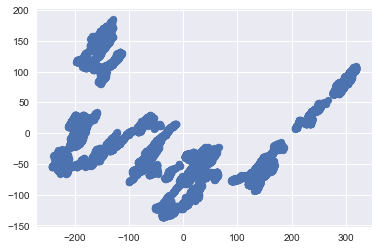

In [56]:
pl.scatter(X_reduced[:,0], X_reduced[:,1], cmap = 'RdYlBu')

In [57]:
k_means = KMeans(n_clusters = 3, random_state = 0)
k_means.fit(data)
y_pred = k_means.predict(data)

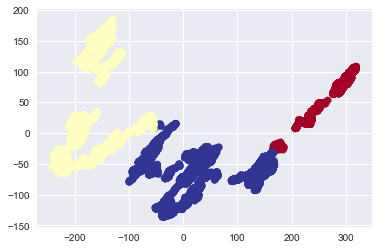

In [58]:
pl.scatter(X_reduced[:,0], X_reduced[:,1], c= y_pred, cmap = 'RdYlBu')

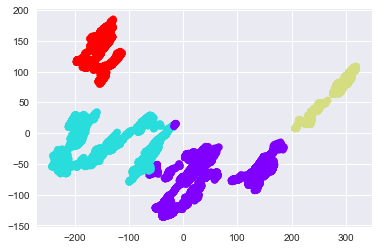

In [59]:
# Try with 4 clusters
from sklearn.cluster import KMeans
est = KMeans(4)
est.fit(data)
y_kmeans = est.predict(data)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c= y_kmeans, s = 50, cmap = 'rainbow')

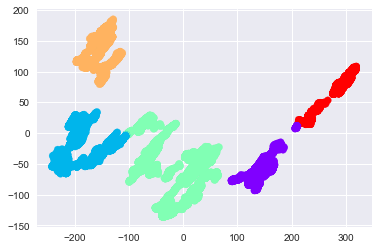

In [60]:
# Now, with 5 clusters

from sklearn.cluster import KMeans
est = KMeans(5)
est.fit(data)
y_kmeans = est.predict(data)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c= y_kmeans, s = 50, cmap = 'rainbow')

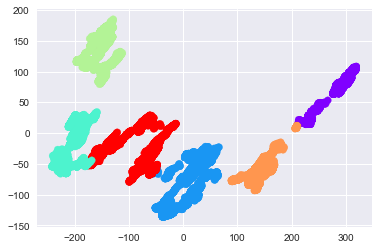

In [61]:
# Now, with 6 clusters

from sklearn.cluster import KMeans
est = KMeans(6)
est.fit(data)
y_kmeans = est.predict(data)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c= y_kmeans, s = 50, cmap = 'rainbow')

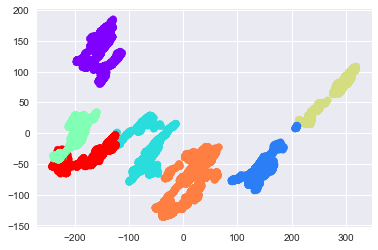

In [62]:
# Now, with 7 clusters

from sklearn.cluster import KMeans
est = KMeans(7)
est.fit(data)
y_kmeans = est.predict(data)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c= y_kmeans, s = 50, cmap = 'rainbow')

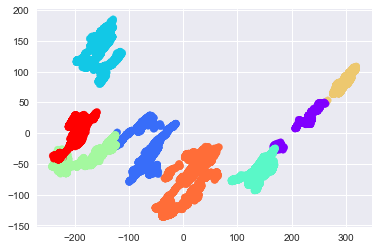

In [63]:
# Now, with 8 clusters

from sklearn.cluster import KMeans
est = KMeans(8)
est.fit(data)
y_kmeans = est.predict(data)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c= y_kmeans, s = 50, cmap = 'rainbow')

#### Apparently, it looks like either 6, 7 or 8 clusters would suffice; let us validate this using elbow curve

In [70]:
import numpy as np
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,14)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(data) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]



In [71]:
# Calculate the Euclidean distance from each point to each cluster center
k_euclid = [cdist(data, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]


In [72]:
# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(data)**2)/data.shape[0]

# The between-cluster sum of squares
bss = tss - wcss


Text(0.5,1,'Variance Explained vs. k')

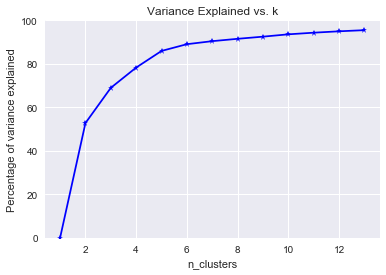

In [73]:

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')

#### Elbow curve also suggests 6 to 8 clusters as a good choice. For this project we'll settle with 8 clusters

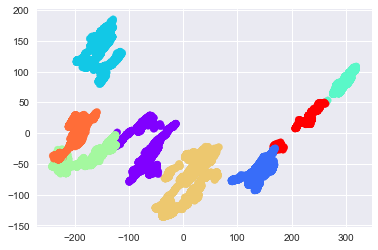

In [74]:
from sklearn.cluster import KMeans
est = KMeans(8)
est.fit(data)
y_kmeans = est.predict(data)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c= y_kmeans, s = 50, cmap = 'rainbow')

In [75]:
from sklearn.metrics import silhouette_score
labels = est.labels_
silhouette_score(data, labels, metric='euclidean')

0.4797349587730816

#### Silhouette score is low enough and validates the choice of the number of clusters of 8

In [76]:
labels = est.labels_
k1,k2,k3,k4,k5,k6,k7,k8 = [X_reduced[np.where(labels==i)] for i in range(8)] # range(8) because 8 clusters

In [80]:
print ("Cluster 1 = ",k1.shape)
print ("Cluster 2 = ",k2.shape)
print ("Cluster 3 = ",k3.shape)
print ("Cluster 4 = ",k4.shape)
print ("Cluster 5 = ",k5.shape)
print ("Cluster 6 = ",k6.shape)
print ("Cluster 7 = ",k7.shape)
print ("Cluster 8 = ",k8.shape)

Cluster 1 =  (4959, 3)
Cluster 2 =  (6240, 3)
Cluster 3 =  (6647, 3)
Cluster 4 =  (5475, 3)
Cluster 5 =  (4638, 3)
Cluster 6 =  (7430, 3)
Cluster 7 =  (3907, 3)
Cluster 8 =  (1970, 3)


In [98]:
labels = est.labels_
c1,c2,c3,c4,c5,c6,c7,c8 = [pca.inverse_transform(X_reduced)[np.where(labels==i)] for i in range(8)] # range(8) because 8 clusters

In [99]:
print ("Cluster 1 = ",c1.shape)
print ("Cluster 2 = ",c2.shape)
print ("Cluster 3 = ",c3.shape)
print ("Cluster 4 = ",c4.shape)
print ("Cluster 5 = ",c5.shape)
print ("Cluster 6 = ",c6.shape)
print ("Cluster 7 = ",c7.shape)
print ("Cluster 8 = ",c8.shape)

Cluster 1 =  (4959, 500)
Cluster 2 =  (6240, 500)
Cluster 3 =  (6647, 500)
Cluster 4 =  (5475, 500)
Cluster 5 =  (4638, 500)
Cluster 6 =  (7430, 500)
Cluster 7 =  (3907, 500)
Cluster 8 =  (1970, 500)


In [157]:
# To get the indices of the points for each corresponding cluster
import numpy as np
mydict = {i: pca.inverse_transform(X_reduced)[np.where(labels==i)][0] for i in range(8)}

# Transform this dictionary into list
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [158]:
dictlist

[[0, array([  48.97442257,  151.96784422,  143.19338415,   80.65389368,
          100.73256832,  109.28545418,   47.80064935,  115.21664474,
           45.20914024,   11.88964705,  164.10659886,  991.75412544,
           59.89644289,  244.87104005,   33.03129856,  262.59970244,
           32.81061248,   89.7954833 ,  122.80744005,   66.85227405,
           67.50808367,  339.75972997,   71.49443034,   40.56115987,
          121.84382356,  169.73518755,   31.80233592,   53.52419764,
          126.33737858,   67.7151534 ,   81.38924597,   25.34709865,
           24.58330519,   63.37396626,   75.12119503,  113.52194114,
           34.90276368,  440.60511132,   61.05324429,   36.67629612,
           54.55752024,  148.21827584,   42.6191899 ,  154.39773752,
          126.59490604,  123.99212492,   24.94845519,   36.96824969,
           26.82725373,   27.11301651,   67.22615139,  963.26718643,
          984.12884444,   52.01344731,   33.59612602,  107.00660855,
           12.9483982 ,   44.02

#### Q1) Which stocks are similar? 
Ans: Those in the same cluster
#### Q2) How many unique patterns? 
Ans: 8 distinct patterns
#### Q3) Which stocks moving together? 
Ans: Those in the same cluster